In [3]:
import os
import sys
import importlib
import matplotlib.pyplot as plt
if '../utils' not in sys.path:
    sys.path.insert(0,'../utils')
import lmp
import lmpsetup
import analysis
import plotter
import numpy as np

importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis);
importlib.reload(plotter);

In [4]:
cpeb4     = 'MGDYGFGVLVQSNTGNKSAFPVRFHPHLQPPHHHQNATPSPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLSPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRSPASPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGITPLNSISPLKKNFASNHIQLQKYARPSSAFAPKSWMEDSLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKARTYGRRRGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE'
cpeb4_7D  = 'MGDYGFGVLVQSNTGNKDAFPVRFHPHLQPPHHHQNADPDPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLDPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRDPADPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGITPLNSISPLKKNFASNHIQLQKYARPSDAFAPKSWMEDSLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKARTYGRRRGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE'
cpeb4_12D = 'MGDYGFGVLVQSNTGNKDAFPVRFHPHLQPPHHHQNADPDPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLDPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRDPADPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGIDPLNDIDPLKKNFASNHIQLQKYARPSDAFAPKDWMEDDLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKARTYGRRRGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE'
cpeb4_d4  = 'MGDYGFGVLVQSNTGNKSAFPVRFHPHLQPPHHHQNATPSPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLSPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRSPASPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGITPLNSISPLKKNFASNHIQLQKYARPSSAFAPKSWMEDSLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE'

**Available Runs**

In [43]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)
idx = plotty.make_index(force_update=True);
print(idx[['Protein','I','Eps','Scale']])

       Protein    I Eps  Scale
0    12D_CPEB4   10  10   1.00
1    12D_CPEB4  400  10   1.00
2    12D_CPEB4   10  80   0.80
3    12D_CPEB4  400  80   0.80
4    12D_CPEB4   10  80   1.00
5    12D_CPEB4  400  80   1.00
6     7D_CPEB4   10  10   1.00
7     7D_CPEB4  400  10   1.00
8     7D_CPEB4   10  80   0.80
9     7D_CPEB4  400  80   0.80
10    7D_CPEB4   10  80   1.00
11    7D_CPEB4  400  80   1.00
12       CPEB4   13  10   0.55
13       CPEB4    1  10   0.55
14       CPEB4   13  10   0.70
15       CPEB4    1  10   0.70
16       CPEB4   13  10   0.85
17       CPEB4    1  10   0.85
18       CPEB4   13  10   1.00
19       CPEB4    1  10   1.00
20       CPEB4   10  10   1.00
21       CPEB4  400  10   1.00
22       CPEB4   10  80   0.80
23       CPEB4  400  80   0.80
24       CPEB4   10  80   1.00
25       CPEB4  400  80   1.00
26       CPEB4   95  80   1.00
27       CPEB4   25  80   0.55
28       CPEB4   25  80   0.70
29       CPEB4   25  80   0.85
30       CPEB4   25  80   1.00
31      

### Effect of charges (low ε, low I) on variants

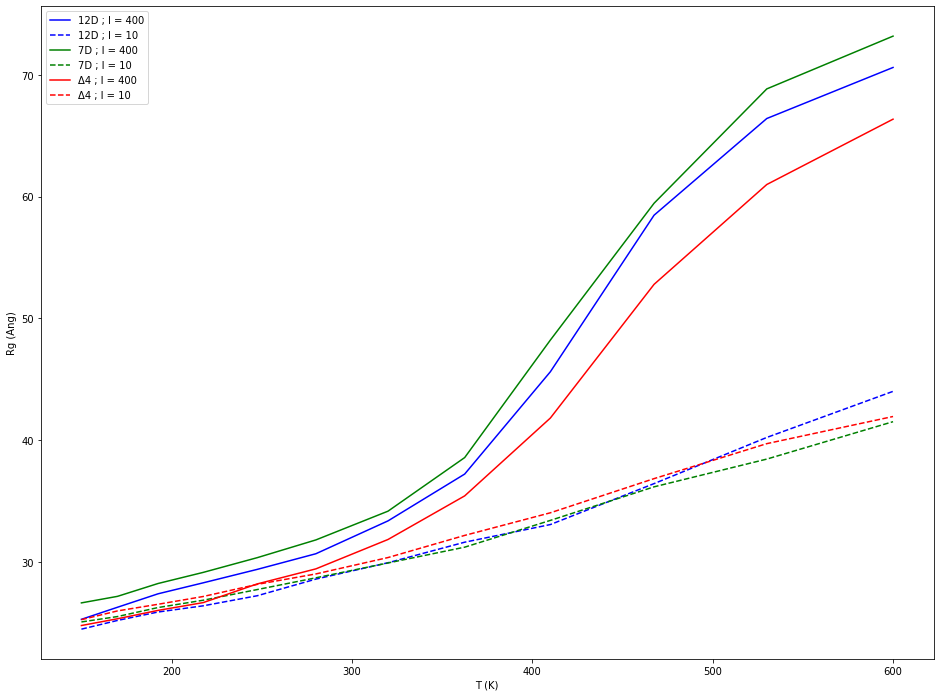

In [82]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

# plotty.plot(observable='rg', protein='CPEB4', I=400, eps=10, ls=1.00,label='WT ; I = 400', style='-k')
# plotty.plot(observable='rg', protein='CPEB4', I=10, eps=10, ls=1.00, label='WT ; I = 10', style='--k')

plotty.plot(observable='rg', protein='12D_CPEB4', I=400, eps=10, ls=1.00, label='12D ; I = 400', style='-b')
plotty.plot(observable='rg', protein='12D_CPEB4', I=10, eps=10, ls=1.00, label='12D ; I = 10', style='--b')

plotty.plot(observable='rg', protein='7D_CPEB4', I=400, eps=10, ls=1.00, label='7D ; I = 400', style='-g')
plotty.plot(observable='rg', protein='7D_CPEB4', I=10, eps=10, ls=1.00, label='7D ; I = 10', style='--g')

plotty.plot(observable='rg', protein='CPEB4_D4', I=400, eps=10, ls=1.00, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='rg', protein='CPEB4_D4', I=10, eps=10, ls=1.00, label='\u03944 ; I = 10', style='--r')

In [ ]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

# plotty.plot(observable='flory', protein='CPEB4', I=400, eps=10, ls=1.00,label='WT ; I = 400', style='-k')
# plotty.plot(observable='flory', protein='CPEB4', I=10, eps=10, ls=1.00, label='WT ; I = 10', style='--k')

plotty.plot(observable='flory', protein='12D_CPEB4', I=400, eps=10, ls=1.00, label='12D ; I = 400', style='-b')
plotty.plot(observable='flory', protein='12D_CPEB4', I=10, eps=10, ls=1.00, label='12D ; I = 10', style='--b')

plotty.plot(observable='flory', protein='7D_CPEB4', I=400, eps=10, ls=1.00, label='7D ; I = 400', style='-g')
plotty.plot(observable='flory', protein='7D_CPEB4', I=10, eps=10, ls=1.00, label='7D ; I = 10', style='--g')

plotty.plot(observable='flory', protein='CPEB4_D4', I=400, eps=10, ls=1.00, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='flory', protein='CPEB4_D4', I=10, eps=10, ls=1.00, label='\u03944 ; I = 10', style='--r')

### Effect of I on variants

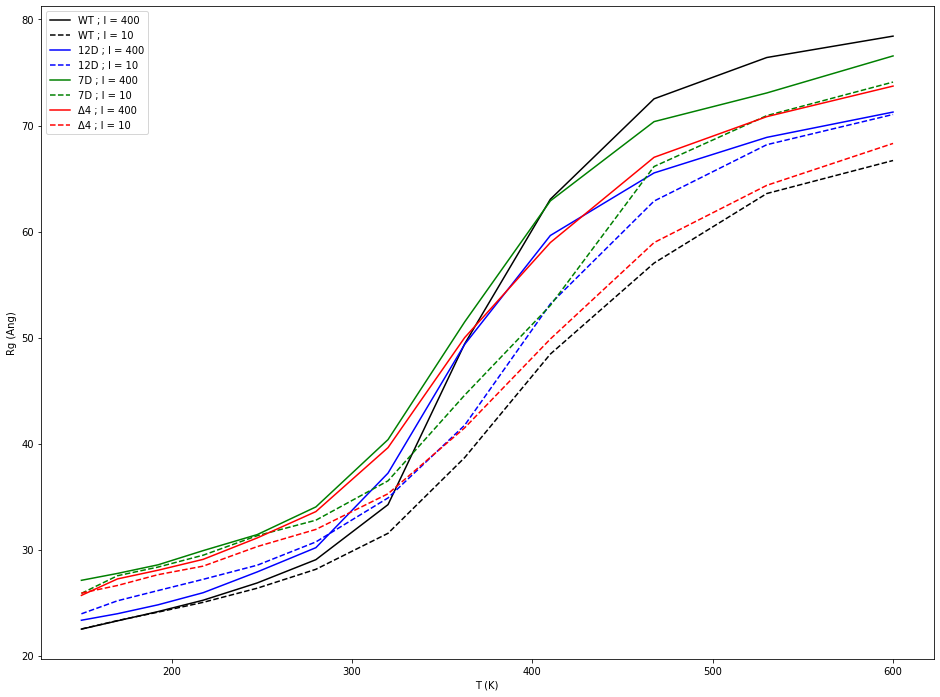

In [46]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='rg', protein='CPEB4', I=400, eps=80, ls=1.00,label='WT ; I = 400', style='-k')
plotty.plot(observable='rg', protein='CPEB4', I=10, eps=80, ls=1.00, label='WT ; I = 10', style='--k')

plotty.plot(observable='rg', protein='12D_CPEB4', I=400, eps=80, ls=1.00, label='12D ; I = 400', style='-b')
plotty.plot(observable='rg', protein='12D_CPEB4', I=10, eps=80, ls=1.00, label='12D ; I = 10', style='--b')

plotty.plot(observable='rg', protein='7D_CPEB4', I=400, eps=80, ls=1.00, label='7D ; I = 400', style='-g')
plotty.plot(observable='rg', protein='7D_CPEB4', I=10, eps=80, ls=1.00, label='7D ; I = 10', style='--g')

plotty.plot(observable='rg', protein='CPEB4_D4', I=400, eps=80, ls=1.00, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='rg', protein='CPEB4_D4', I=10, eps=80, ls=1.00, label='\u03944 ; I = 10', style='--r')

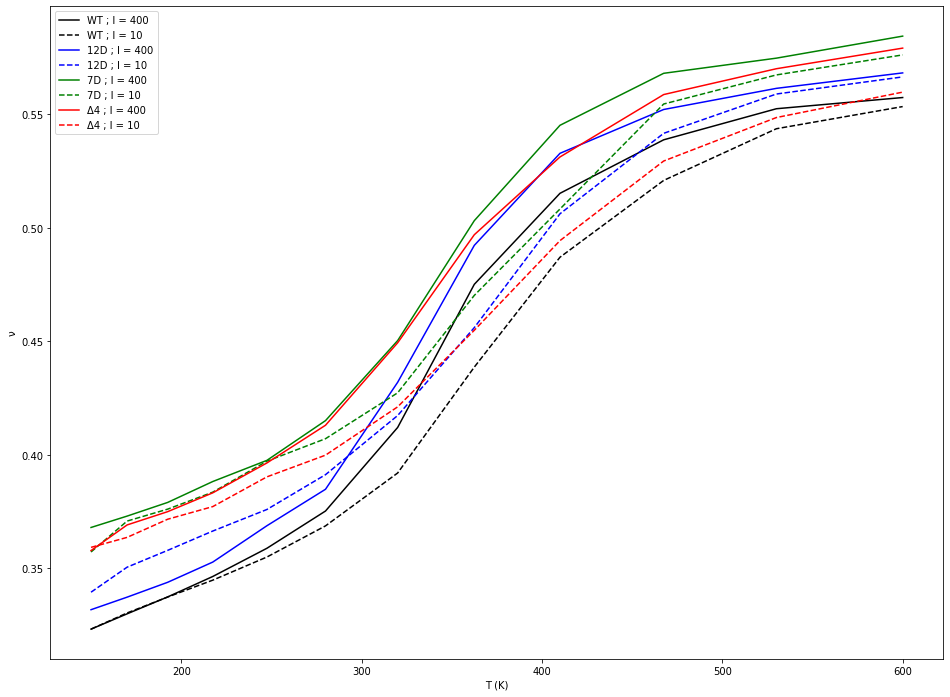

In [47]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='flory', protein='CPEB4', I=400, eps=80, ls=1.00,label='WT ; I = 400', style='-k')
plotty.plot(observable='flory', protein='CPEB4', I=10, eps=80, ls=1.00, label='WT ; I = 10', style='--k')

plotty.plot(observable='flory', protein='12D_CPEB4', I=400, eps=80, ls=1.00, label='12D ; I = 400', style='-b')
plotty.plot(observable='flory', protein='12D_CPEB4', I=10, eps=80, ls=1.00, label='12D ; I = 10', style='--b')

plotty.plot(observable='flory', protein='7D_CPEB4', I=400, eps=80, ls=1.00, label='7D ; I = 400', style='-g')
plotty.plot(observable='flory', protein='7D_CPEB4', I=10, eps=80, ls=1.00, label='7D ; I = 10', style='--g')

plotty.plot(observable='flory', protein='CPEB4_D4', I=400, eps=80, ls=1.00, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='flory', protein='CPEB4_D4', I=10, eps=80, ls=1.00, label='\u03944 ; I = 10', style='--r')

/home/adria/data/prod/lammps/12D_CPEB4/EPS/80/1.0ls-400I-80e /home/adria/data/prod/lammps/7D_CPEB4/EPS/80/1.0ls-400I-80e
/home/adria/data/prod/lammps/7D_CPEB4/EPS/80/1.0ls-400I-80e /home/adria/data/prod/lammps/12D_CPEB4/EPS/80/1.0ls-400I-80e


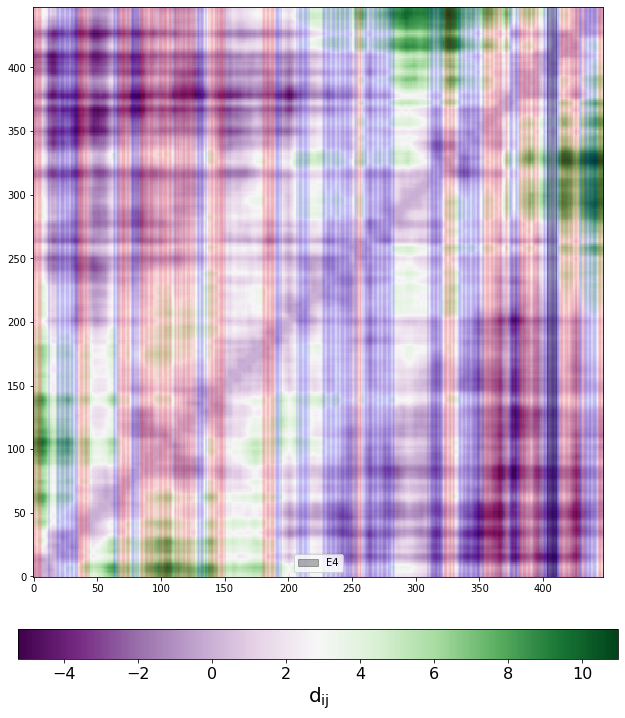

In [41]:
importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis);
importlib.reload(plotter);

plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='distance_map', protein='12D_CPEB4', I=400, eps=80, ls=1.00, label='12D ; I = 400', sequence=cpeb4_12D, protein2='7D_CPEB4')
# plotty.plot(observable='distance_map', protein='12D_CPEB4', I=10, eps=80, ls=1.00, label='12D ; I = 10', sequence=cpeb4_12D, protein2='7D_CPEB4')

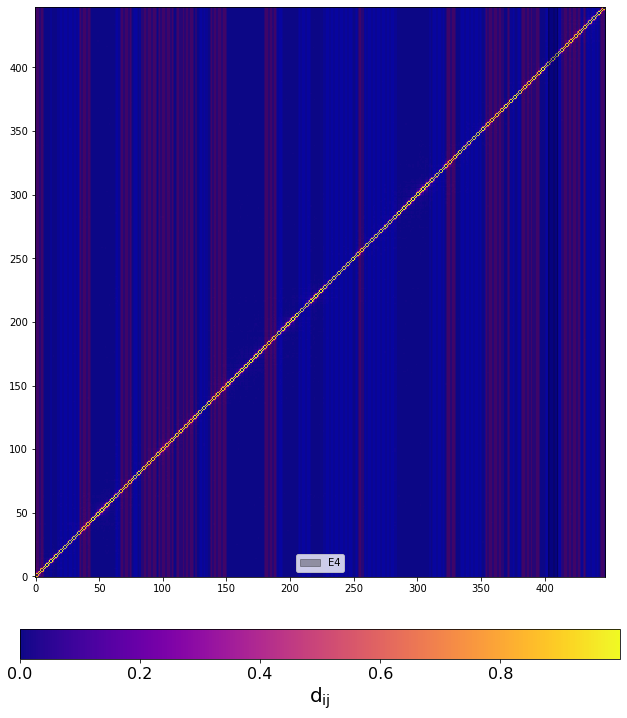

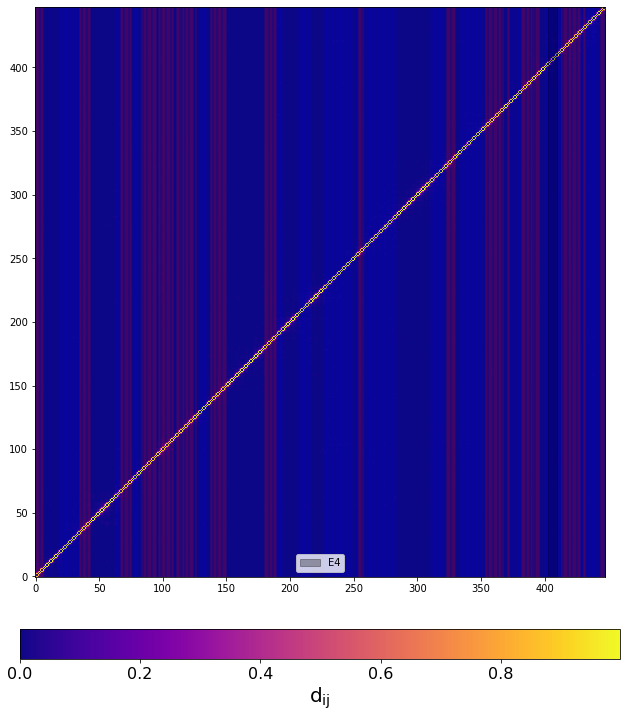

In [40]:
importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis);
importlib.reload(plotter);

plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='contact_map', protein='12D_CPEB4', I=400, eps=80, ls=1.00, label='12D ; I = 400', sequence=cpeb4_12D)
plotty.plot(observable='contact_map', protein='7D_CPEB4', I=10, eps=80, ls=1.00, label='12D ; I = 10', sequence=cpeb4_12D)

### Effect of Hydrophobicity on variants

KeyboardInterrupt: 

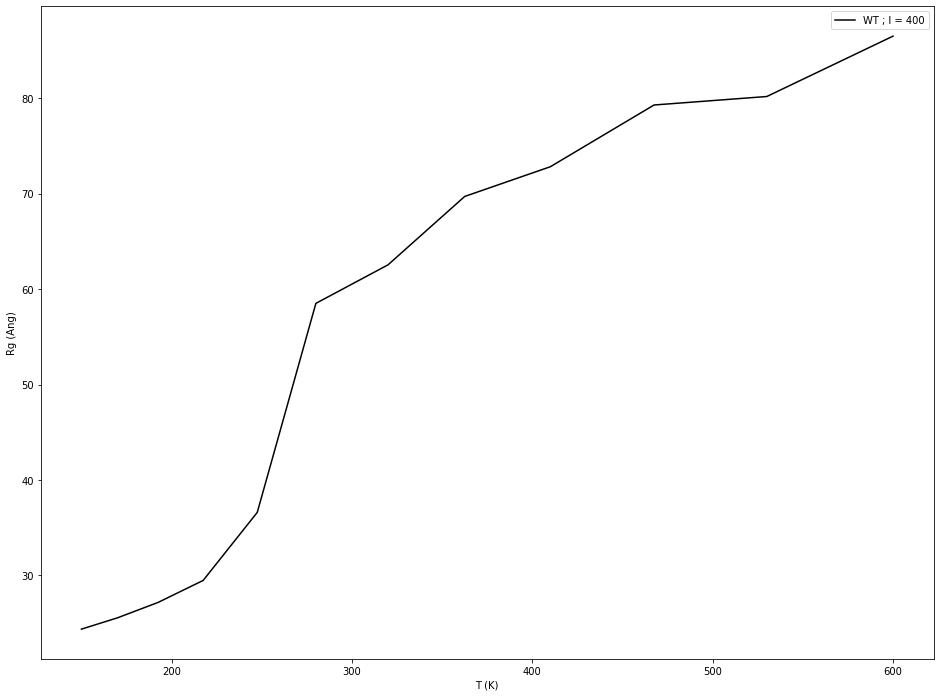

In [17]:


plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='rg', protein='CPEB4', I=400, eps=80, ls=0.8,label='WT ; I = 400', style='-k')
plotty.plot(observable='rg', protein='CPEB4', I=10, eps=80, ls=0.8, label='WT ; I = 10', style='--k')

plotty.plot(observable='rg', protein='12D_CPEB4', I=400, eps=80, ls=0.8, label='12D ; I = 400', style='-b')
plotty.plot(observable='rg', protein='12D_CPEB4', I=10, eps=80, ls=0.8, label='12D ; I = 10', style='--b')

plotty.plot(observable='rg', protein='7D_CPEB4', I=400, eps=80, ls=0.8, label='7D ; I = 400', style='-g')
plotty.plot(observable='rg', protein='7D_CPEB4', I=10, eps=80, ls=0.8, label='7D ; I = 10', style='--g')

plotty.plot(observable='rg', protein='CPEB4_D4', I=400, eps=80, ls=0.8, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='rg', protein='CPEB4_D4', I=10, eps=80, ls=0.8, label='\u03944 ; I = 10', style='--r')

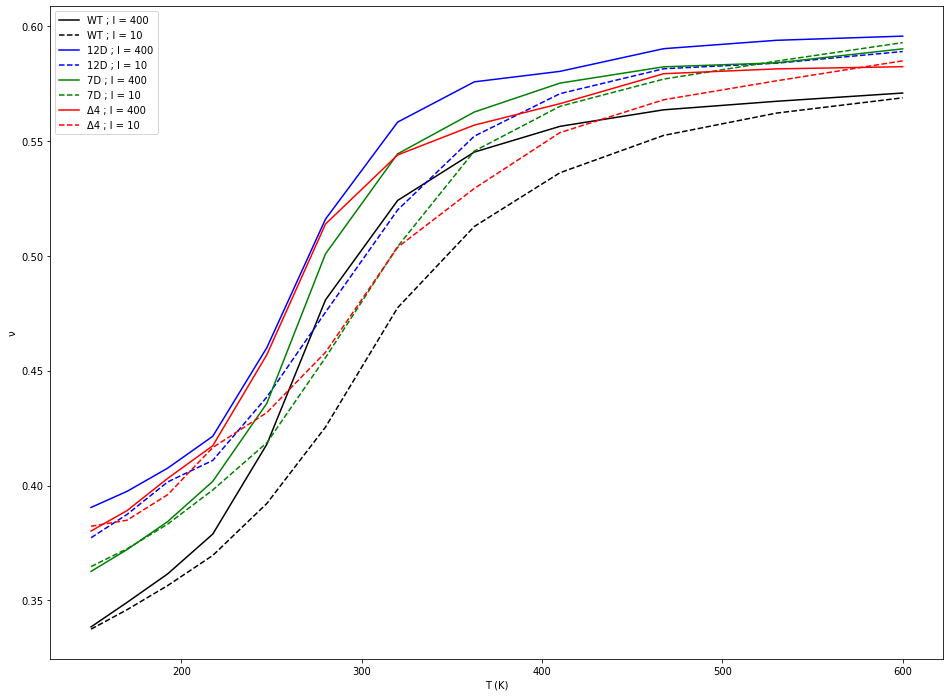

In [51]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='flory', protein='CPEB4', I=400, eps=80, ls=0.8,label='WT ; I = 400', style='-k')
plotty.plot(observable='flory', protein='CPEB4', I=10, eps=80, ls=0.8, label='WT ; I = 10', style='--k')

plotty.plot(observable='flory', protein='12D_CPEB4', I=400, eps=80, ls=0.8, label='12D ; I = 400', style='-b')
plotty.plot(observable='flory', protein='12D_CPEB4', I=10, eps=80, ls=0.8, label='12D ; I = 10', style='--b')

plotty.plot(observable='flory', protein='7D_CPEB4', I=400, eps=80, ls=0.8, label='7D ; I = 400', style='-g')
plotty.plot(observable='flory', protein='7D_CPEB4', I=10, eps=80, ls=0.8, label='7D ; I = 10', style='--g')

plotty.plot(observable='flory', protein='CPEB4_D4', I=400, eps=80, ls=0.8, label='\u03944 ; I = 400',style='-r')
plotty.plot(observable='flory', protein='CPEB4_D4', I=10, eps=80, ls=0.8, label='\u03944 ; I = 10', style='--r')

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

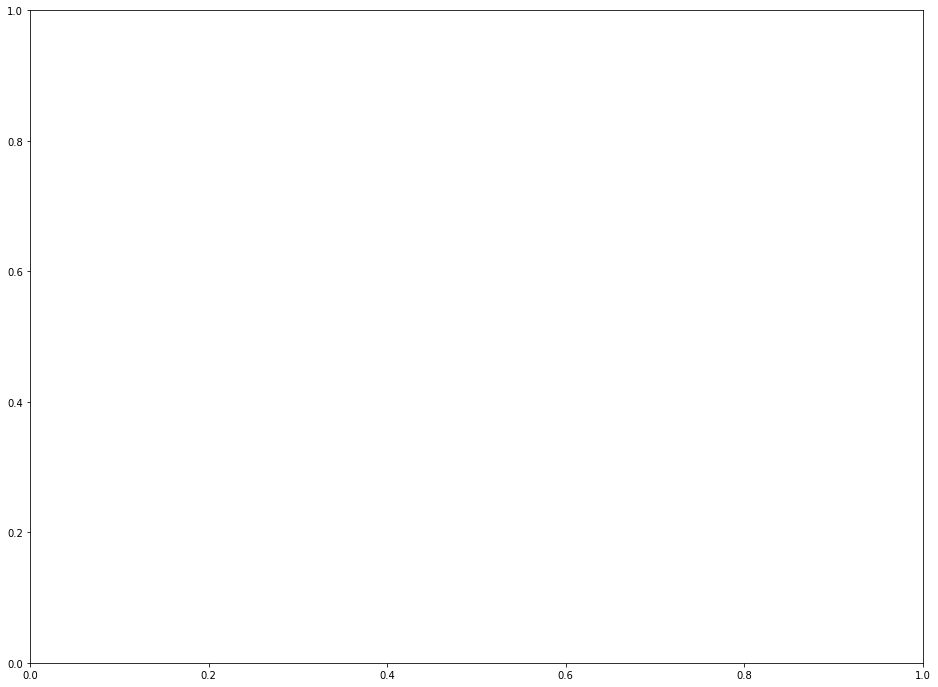

In [16]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='distance_map', protein='12D_CPEB4', I=400, eps=80, ls=0.8, label='12D ; I = 400', sequence=cpeb4_12D, protein2='7D_CPEB4')
plotty.plot(observable='distance_map', protein='12D_CPEB4', I=10, eps=80, ls=0.8, label='12D ; I = 10', sequence=cpeb4_12D, protein2='7D_CPEB4')

# plotty.plot(observable='distance_map', protein='7D_CPEB4', I=400, eps=80, ls=0.8, label='7D ; I = 400', sequence=cpeb4_7D)
# plotty.plot(observable='distance_map', protein='7D_CPEB4', I=10, eps=80, ls=0.8, label='7D ; I = 10', sequence=cpeb4_7D)

# plotty.plot(observable='distance_map', protein='CPEB4_D4', I=400, eps=80, ls=0.8, label='\u03944 ; I = 400', sequence=cpeb4_d4)
# plotty.plot(observable='distance_map', protein='CPEB4_D4', I=10, eps=80, ls=0.8, label='\u03944 ; I = 10', sequence=cpeb4_d4)

In [ ]:
importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis);
importlib.reload(plotter);

plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='contact_map', protein='12D_CPEB4', I=400, eps=80, ls=0.8, label='12D ; I = 400', sequence=cpeb4_12D)
plotty.plot(observable='contact_map', protein='12D_CPEB4', I=10, eps=80, ls=0.8, label='12D ; I = 10', sequence=cpeb4_12D)

# plotty.plot(observable='contact_map', protein='7D_CPEB4', I=400, eps=80, ls=0.8, label='7D ; I = 400', sequence=cpeb4_7D)
# plotty.plot(observable='contact_map', protein='7D_CPEB4', I=10, eps=80, ls=0.8, label='7D ; I = 10', sequence=cpeb4_7D)

# plotty.plot(observable='contact_map', protein='CPEB4_D4', I=400, eps=80, ls=0.8, label='\u03944 ; I = 400', sequence=cpeb4_d4)
# plotty.plot(observable='contact_map', protein='CPEB4_D4', I=10, eps=80, ls=0.8, label='\u03944 ; I = 10' , sequence=cpeb4_d4)

### λ = 0

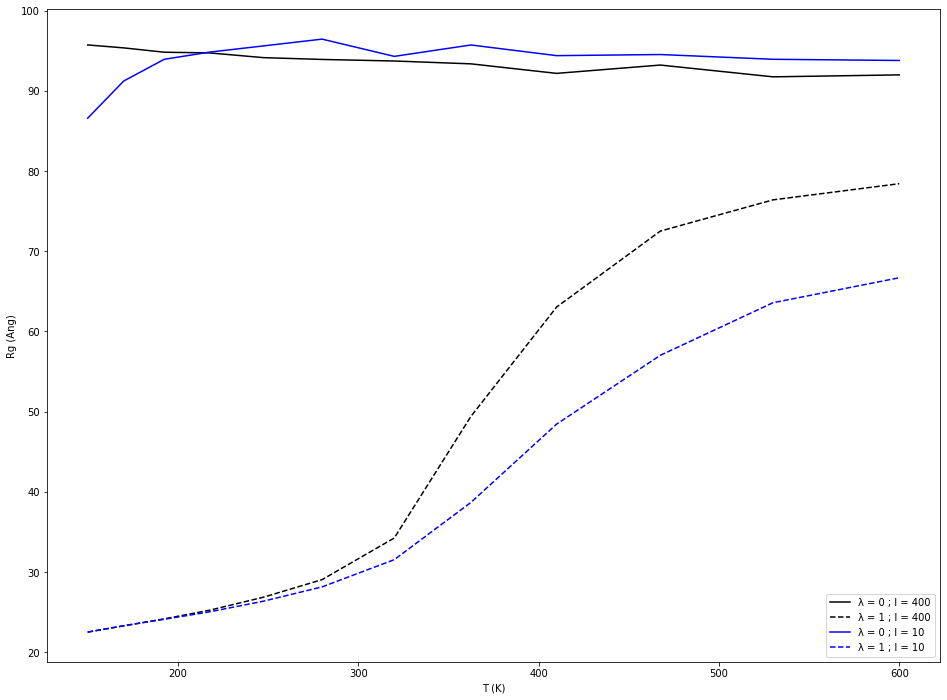

In [52]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='rg', protein='CPEB4', I=400, eps=80, ls=0.0, label='λ = 0 ; I = 400', style='-k')
plotty.plot(observable='rg', protein='CPEB4', I=400, eps=80, ls=1.0, label='λ = 1 ; I = 400', style='--k')

plotty.plot(observable='rg', protein='CPEB4', I=10, eps=80, ls=0.0, label='λ = 0 ; I = 10', style='-b')
plotty.plot(observable='rg', protein='CPEB4', I=10, eps=80, ls=1.0, label='λ = 1 ; I = 10', style='--b')

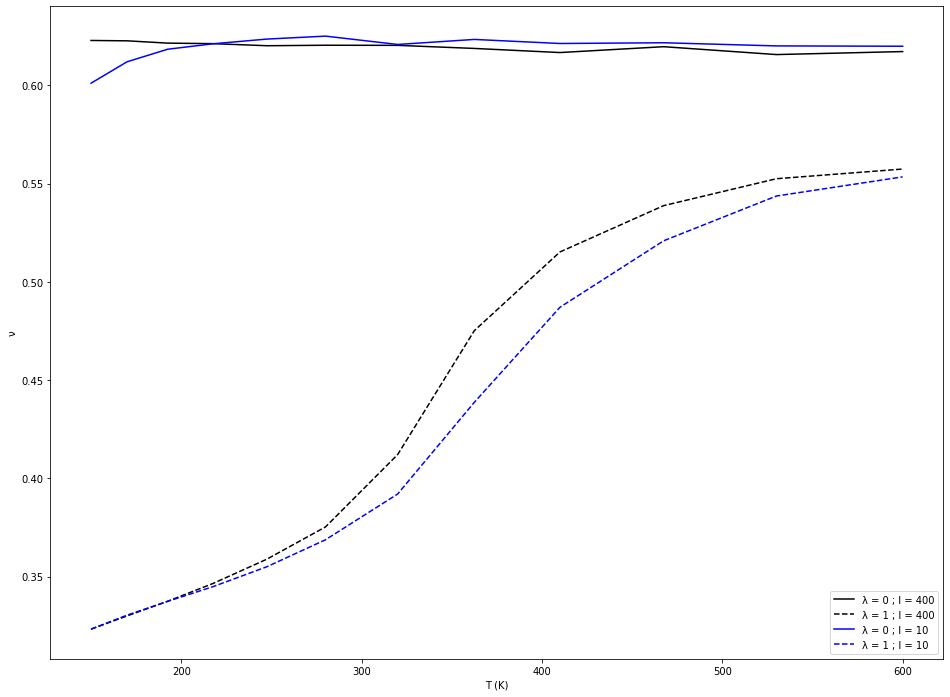

In [53]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='flory', protein='CPEB4', I=400, eps=80, ls=0.0, label='λ = 0 ; I = 400', style='-k')
plotty.plot(observable='flory', protein='CPEB4', I=400, eps=80, ls=1.0, label='λ = 1 ; I = 400', style='--k')

plotty.plot(observable='flory', protein='CPEB4', I=10, eps=80, ls=0.0, label='λ = 0 ; I = 10', style='-b')
plotty.plot(observable='flory', protein='CPEB4', I=10, eps=80, ls=1.0, label='λ = 1 ; I = 10', style='--b')

### SCRAMBLE

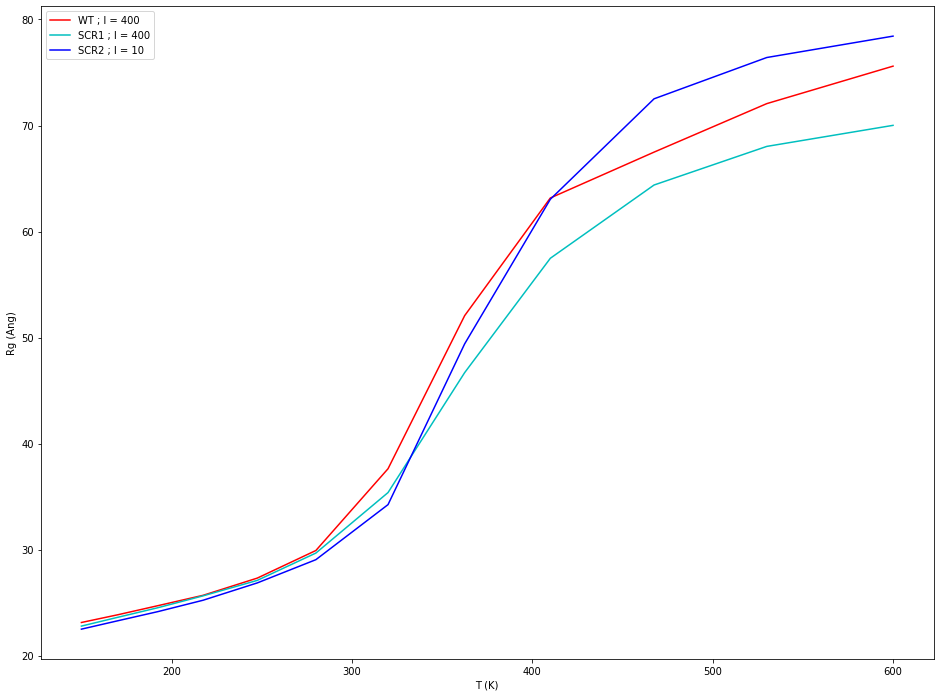

In [55]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='rg', protein='CPEB4_SCR1', I=400, eps=80, ls=1.0,label='WT ; I = 400', style='-r')
plotty.plot(observable='rg', protein='CPEB4_SCR2', I=400, eps=80, ls=1.0,label='SCR1 ; I = 400', style='-c')
plotty.plot(observable='rg', protein='CPEB4', I=400, eps=80, ls=1.0, label='SCR2 ; I = 10', style='-b')

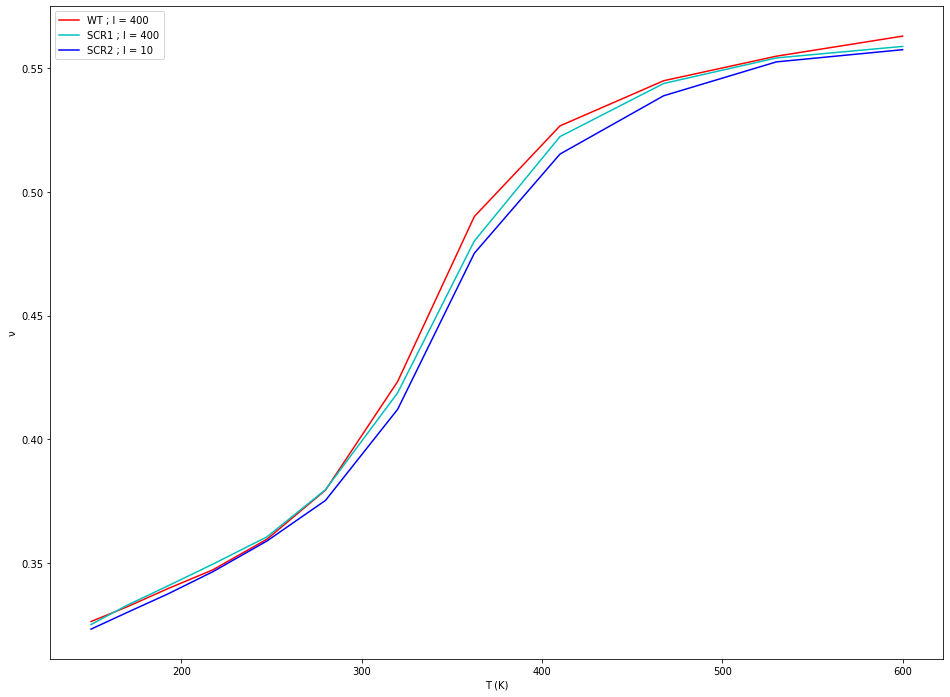

In [60]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='flory', protein='CPEB4_SCR1', I=400, eps=80, ls=1.0,label='WT ; I = 400', style='-r')
plotty.plot(observable='flory', protein='CPEB4_SCR2', I=400, eps=80, ls=1.0,label='SCR1 ; I = 400', style='-c')
plotty.plot(observable='flory', protein='CPEB4', I=400, eps=80, ls=1.0, label='SCR2 ; I = 10', style='-b')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


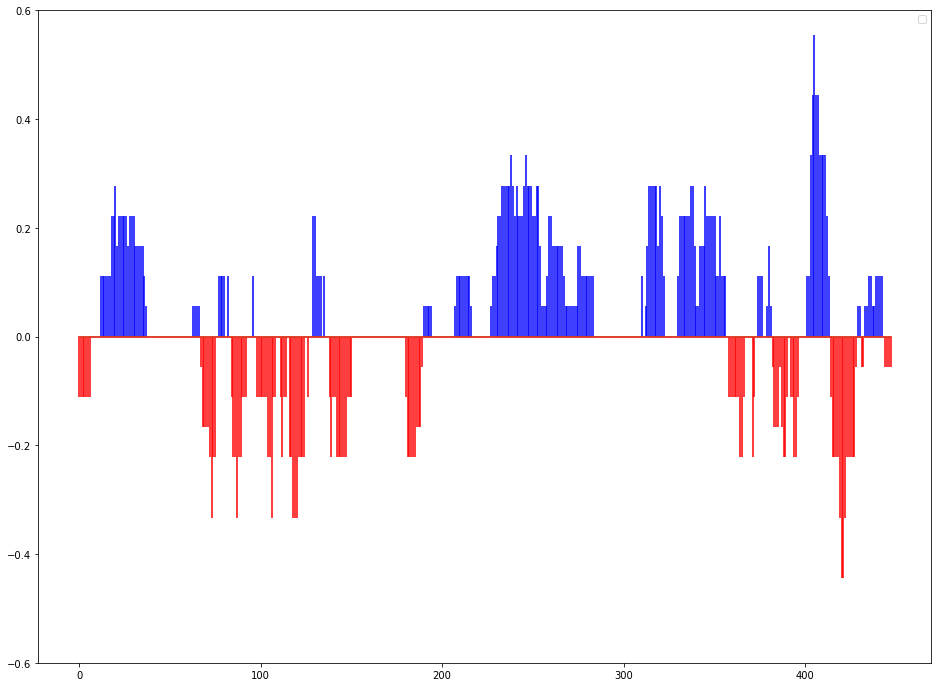

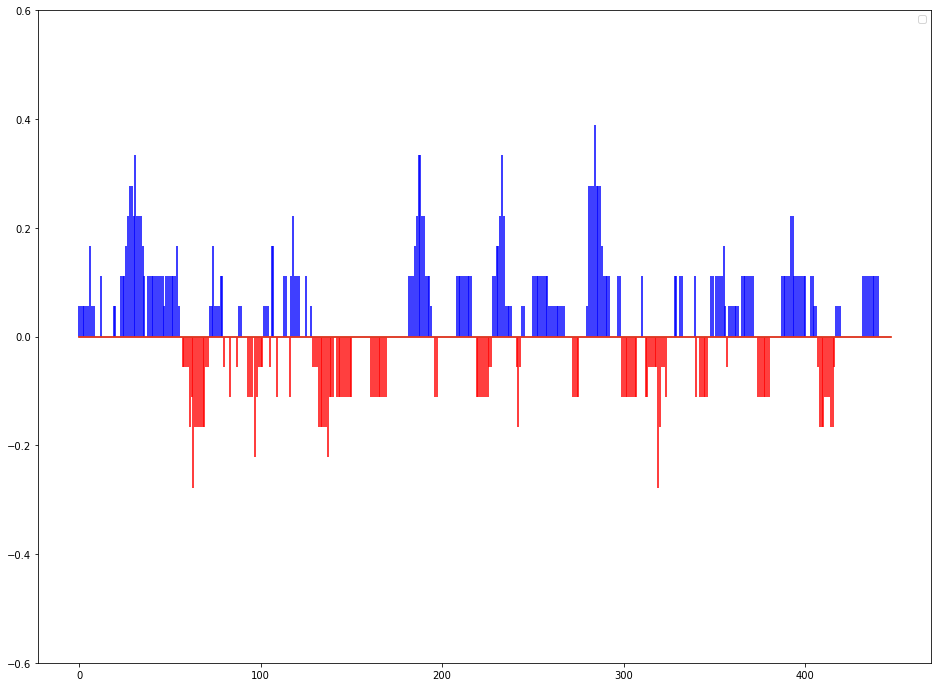

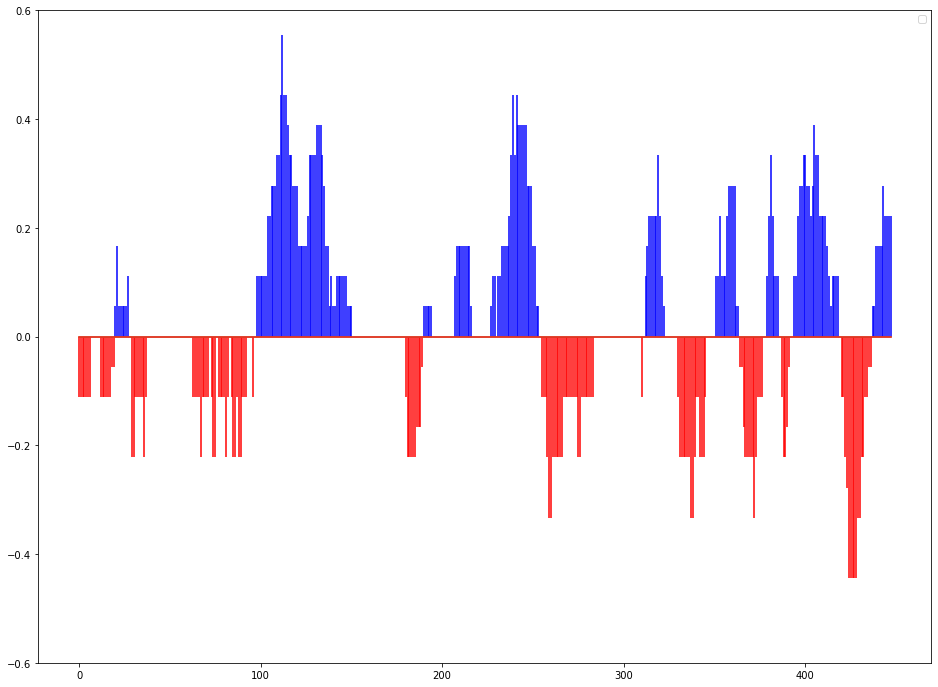

In [61]:
scr2 = 'MGDYGFGVLVQSNTGNESAFPVHFKPDLQPPREEQNATPSPAAFINNNTAANGSSAGSAWLFPAPATENIQEKILGSEDAKSQQQEQQDPLKEQQLSPSPGQRAGILPRTHKAHSKRNQGHNSSKNGNGHHKIRIHSPVLTGFHYQHATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPRHVSPGFGGSFSPQIGPLSQHHPDRPHFQHKKSQRQQQHRSPASPEPPPFTEENAAFNQLPDLANNLNDPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGDKKHHGLNGGITPLNSISPLDENFASNDIQLQEYAKPSSAFAPRSWMRHSLNDAENIFPFPDEPKTFRMRSLDSSLIEIMHAHNRTIHARTYGHHRGQSSLFPMHHGFLDDGEGDQPLESGLGSPHCFSRQNGR'
scr1 = 'MDRYHFGVLVQSNTGNKEAFPVNHGHERQPHHKGQNATPSPAKFINNNTAAHHSSAGSHDLFPAPDHENIQNSILHSPRDSSHQDHQQQPLGKEQLSESPKEGHGILPPTRGEDKAGKQGEKSSLNGNGQAQHDIQEPVLTGFSYQDATGLGTSTQPLTSSASSLDGFSNWSAAIAPSSSTIINNPKSFHHKGEVPAASANNGALLFQNFPARVSPGFGGSFSDQIGPLSHAHPHPHRDDQHWSQTQQQIQSPAKPPPPPFTFHNAAFNQLPNLANELNSRPSPHKSYRSPSETRSSSWSPGGEGYGGWGGSQGREDQHGLNGEITPLRSISPLERNFASNFIQEKDYALPRREFAPASHMAISLNSAFRIFPFPNDPSTFQMTSLNSSLIRIMPARNETKSAGTYGAAHGDDSLHPMSGGFLWWGGGQQPLFSGLRSPPCFSPQNGQ'


importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis);
importlib.reload(plotter);
plotty = plotter.Plotter(oliba_wd='.', temper=True)
plotty.plot(observable='charge',  protein='CPEB4', I=400, eps=80, ls=1.0, sequence=cpeb4)
plotty = plotter.Plotter(oliba_wd='.', temper=True)
plotty.plot(observable='charge',  protein='CPEB4_SCR1', I=400, eps=80, ls=1.0, sequence=scr1)
plotty = plotter.Plotter(oliba_wd='.', temper=True)
plotty.plot(observable='charge',  protein='CPEB4_SCR2', I=400, eps=80, ls=1.0, sequence=scr2)

### I vs ε

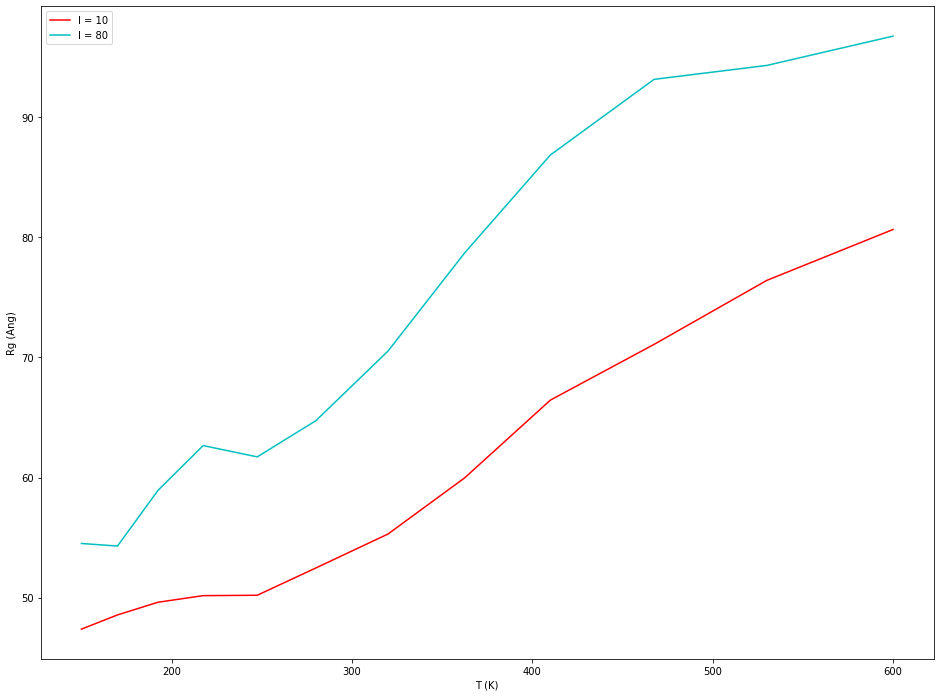

In [62]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='rg', protein='CPEB4_IEps', I=10, eps=10, ls=1.0,label='I = 10', style='-r')
plotty.plot(observable='rg', protein='CPEB4_IEps', I=80, eps=80, ls=1.0,label='I = 80', style='-c')

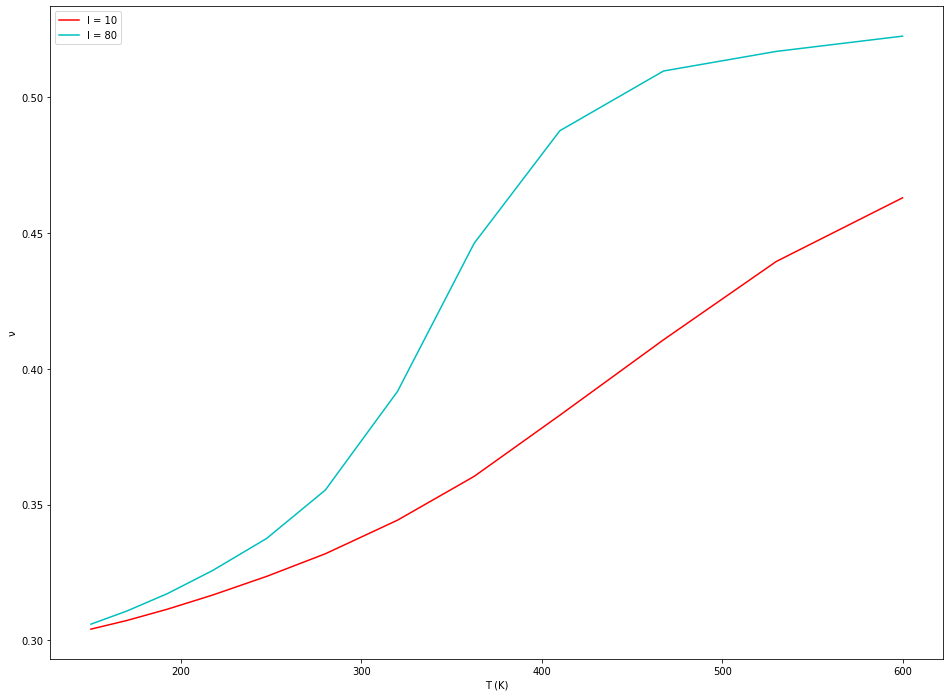

In [63]:
plotty = plotter.Plotter(oliba_wd='.', temper=True)

plotty.plot(observable='flory', protein='CPEB4_IEps', I=10, eps=10, ls=1.0,label='I = 10', style='-r')
plotty.plot(observable='flory', protein='CPEB4_IEps', I=80, eps=80, ls=1.0,label='I = 80', style='-c')

### MULTI CPEB4 (JUST REORDER)

In [40]:
# order = lmp.LMP(oliba_wd='/home/adria/data/prod/lammps/CPEB4x2', temper=True)
# order._temper_trj_reorder()
order = lmp.LMP(oliba_wd='/home/adria/data/prod/lammps/CPEB4x50', temper=True)
order._temper_trj_reorder()

['/home/adria/data/prod/lammps/CPEB4x50/reorder-0.lammpstrj',
 '/home/adria/data/prod/lammps/CPEB4x50/reorder-1.lammpstrj',
 '/home/adria/data/prod/lammps/CPEB4x50/reorder-2.lammpstrj',
 '/home/adria/data/prod/lammps/CPEB4x50/reorder-3.lammpstrj',
 '/home/adria/data/prod/lammps/CPEB4x50/reorder-4.lammpstrj',
 '/home/adria/data/prod/lammps/CPEB4x50/reorder-5.lammpstrj',
 '/home/adria/data/prod/lammps/CPEB4x50/reorder-6.lammpstrj',
 '/home/adria/data/prod/lammps/CPEB4x50/reorder-7.lammpstrj',
 '/home/adria/data/prod/lammps/CPEB4x50/reorder-8.lammpstrj',
 '/home/adria/data/prod/lammps/CPEB4x50/reorder-9.lammpstrj']

In [54]:
print(len(cpeb4))

448


In [ ]:
"7D" : [18, 38, 40, 97, 252, 255, 353],
"12D": [18, 38, 40, 97, 252, 255, 326, 330, 332, 353, 359, 364]

"7D": [18, 38, 40, 97, 252, 255, 353],
"12D": [18, 38, 40, 97, 252, 255, 326, 330, 332, 353, 359, 364]

